#📌 Extracción

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import json
with open('TelecomX_Data.json', 'r') as f:
    data = json.load(f)

df = pd.json_normalize(data)


print("Datos normalizados")
df.head()

Datos normalizados


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

Explorar las columnas del dataset y verificar sus tipos de datos

In [13]:
df.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


In [14]:
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [17]:
# Comparamos Contrato vs Churn
pd.crosstab(df['account.Contract'], df['Churn'])

Churn,,No,Yes
account.Contract,,,
Month-to-month,130,2220,1655
One year,46,1307,166
Two year,48,1647,48


In [18]:
#Comparamos Internet vs Churn
pd.crosstab(df['internet.InternetService'], df['Churn'])

Churn,,No,Yes
internet.InternetService,,,
DSL,67,1962,459
Fiber optic,102,1799,1297
No,55,1413,113


In [19]:
# Promedio de meses de antigüedad
df.groupby('Churn')['customer.tenure'].mean()

,customer.tenure
Churn,
,31.571429
No,37.569965
Yes,17.979133


La columna account.Contract es la más relevante. Los clientes de Fiber optic (Fibra óptica) se van muchísimo más (1297) que los de DSL (459). Los clientes que se quedan (No) llevan en promedio 37 meses.

Los que se van (Yes) apenas duran 17 meses.

In [20]:
#Cuenta cuantos espacios vacios hay en cada columna
df.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [21]:
#Nos dice cuántas filas son exactamente iguales a otras
print("Cantidad de filas duplicadas:", df.duplicated().sum())

Cantidad de filas duplicadas: 0


In [22]:
# palabras unicas hay en las columnas clave
print("Valores en Churn:", df['Churn'].unique())
print("Valores en Internet:", df['internet.InternetService'].unique())
print("Valores en Contrato:", df['account.Contract'].unique())

Valores en Churn: ['No' 'Yes' '']
Valores en Internet: ['DSL' 'Fiber optic' 'No']
Valores en Contrato: ['One year' 'Month-to-month' 'Two year']


In [23]:
# 1. Ver cuántas filas tienen el Churn vacío
vacios = (df['Churn'] == '').sum()
print(f"Filas con Churn vacío: {vacios}")

# 2. Quedarnos solo con las filas que SÍ tienen 'Yes' o 'No'
df = df[df['Churn'] != '']

# 3. Verificar que ya no existan esos vacíos
print("Nuevos valores únicos en Churn:", df['Churn'].unique())

Filas con Churn vacío: 224
Nuevos valores únicos en Churn: ['No' 'Yes']


Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

📌 Esta columna te ayudará a profundizar en el análisis y a obtener información valiosa para las siguientes etapas.

In [25]:
# 1. Buscamos el nombre exacto de la columna que tiene los cargos mensuales
col_mensual = [c for c in df.columns if 'Monthly' in c][0]
print(f"Usando la columna: {col_mensual}")

# 2. Creamos la columna Cuentas_Diarias usando ese nombre
df['Cuentas_Diarias'] = (df[col_mensual] / 30).round(2)

# 3. Mostramos las primeras filas para confirmar
df[[col_mensual, 'Cuentas_Diarias']].head()

Usando la columna: account.Charges.Monthly


,account.Charges.Monthly,Cuentas_Diarias
0,65.6,2.19
1,59.9,2.00
2,73.9,2.46
3,98.0,3.27
4,83.9,2.80


In [26]:
# Renombrar columnas a español
columnas_nuevas = {
    'Churn': 'Abandono',
    'customer.gender': 'Genero',
    'customer.tenure': 'Meses_Antiguedad',
    'account.Contract': 'Tipo_Contrato',
    'account.Charges.Monthly': 'Factura_Mensual',
    'account.Charges.Total': 'Factura_Total',
    'internet.InternetService': 'Servicio_Internet'
}

df = df.rename(columns=columnas_nuevas)

# Ver cómo quedaron
df.head(2)

,customerID,Abandono,Genero,customer.SeniorCitizen,customer.Partner,customer.Dependents,Meses_Antiguedad,phone.PhoneService,phone.MultipleLines,Servicio_Internet,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,Tipo_Contrato,account.PaperlessBilling,account.PaymentMethod,Factura_Mensual,Factura_Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,2.00


In [27]:
# Esto quita el prefijo (lo que está antes del punto) de TODAS las columnas que falten
df.columns = [col.split('.')[-1] for col in df.columns]

# Veamos la lista final limpia
df.columns

Index(['customerID', 'Abandono', 'Genero', 'SeniorCitizen', 'Partner',
       'Dependents', 'Meses_Antiguedad', 'PhoneService', 'MultipleLines',
       'Servicio_Internet', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Tipo_Contrato', 'PaperlessBilling', 'PaymentMethod', 'Factura_Mensual',
       'Factura_Total', 'Cuentas_Diarias'],
      dtype='object')

In [28]:
# Convertimos 'Yes' en 1 y 'No' en 0
df['Abandono_Binario'] = df['Abandono'].map({'Yes': 1, 'No': 0})

# Verificamos la conversión
df[['Abandono', 'Abandono_Binario']].head()

,Abandono,Abandono_Binario
0,No,0
1,No,0
2,Yes,1
3,Yes,1
4,Yes,1


#📊 Carga y análisis

In [29]:
# Estadísticas de las variables numéricas principales
resumen = df[['Meses_Antiguedad', 'Factura_Mensual', 'Factura_Total', 'Cuentas_Diarias']].describe()

# Lo redondeamos para que sea más fácil de leer
resumen.round(2)

,Meses_Antiguedad,Factura_Mensual,Cuentas_Diarias
count,7043.00,7043.00,7043.00
mean,32.37,64.76,2.16
std,24.56,30.09,1.00
min,0.00,18.25,0.61
25%,9.00,35.50,1.18
50%,29.00,70.35,2.34
75%,55.00,89.85,2.99
max,72.00,118.75,3.96


In [30]:
# Comparamos la media de los que se fueron (1) vs los que se quedaron (0)
df.groupby('Abandono_Binario')[['Meses_Antiguedad', 'Factura_Mensual', 'Cuentas_Diarias']].mean().round(2)

,Meses_Antiguedad,Factura_Mensual,Cuentas_Diarias
Abandono_Binario,,,
0,37.57,61.27,2.04
1,17.98,74.44,2.48


/tmp/ipython-input-332224824.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Abandono', data=df, palette='viridis')


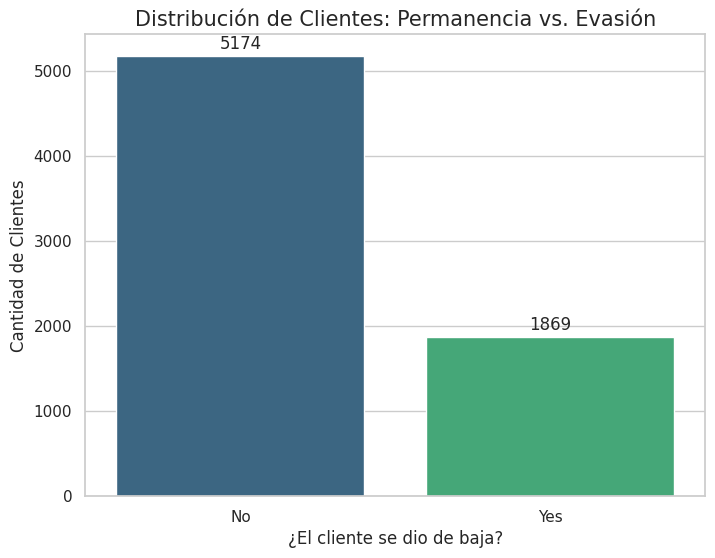

In [31]:
# 1. Configuramos el estilo del gráfico
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))

# 2. Creamos el gráfico de barras
ax = sns.countplot(x='Abandono', data=df, palette='viridis')

# 3. Añadimos títulos y etiquetas claras
plt.title('Distribución de Clientes: Permanencia vs. Evasión', fontsize=15)
plt.xlabel('¿El cliente se dio de baja?', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)

# 4. (Opcional) Mostrar el número exacto sobre cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')

plt.show()

#📄Informe final